### We First load the dataset and set the parameters to the model. For this experiment we are using DNN.

In [1]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
import numpy as np
import pandas as pd

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
### DNN Regression
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import sklearn
# import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')

# req_cols = [ ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
# ' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
# 'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
# ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
# ' Max Packet Length',' Label']

# req_cols = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',' Bwd Packets/s',' Min Packet Length',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count',' RST Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',' Fwd Header Length','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes','Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',' Idle Min',' Label']

# req_cols = [' Down/Up Ratio', ' Fwd URG Flags', ' Flow IAT Std', 'Subflow Fwd Packets', ' Flow Packets/s', ' URG Flag Count', 'FIN Flag Count', ' Bwd Packets/s', 'Bwd Avg Bulk Rate', ' act_data_pkt_fwd', ' Fwd Packet Length Std', ' Bwd Avg Bytes/Bulk', ' Active Max', ' Flow IAT Max', ' min_seg_size_forward', ' Bwd Packet Length Std', ' Fwd IAT Std', ' Fwd Avg Bulk Rate', ' Fwd Packet Length Mean', ' Fwd Packet Length Max', ' Idle Std', ' CWE Flag Count', 'Fwd IAT Total', ' ACK Flag Count', ' Bwd URG Flags', ' Flow IAT Min', ' Flow IAT Mean', ' Total Backward Packets', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' SYN Flag Count', ' Min Packet Length', ' Fwd Packet Length Min', 'Idle Mean', 'Fwd PSH Flags', ' Fwd IAT Min', ' Fwd Header Length', ' RST Flag Count', ' Idle Max', ' PSH Flag Count', ' Bwd Header Length', ' ECE Flag Count', ' Subflow Bwd Packets', 'Active Mean', 'Flow Bytes/s', ' Bwd IAT Mean', ' Avg Fwd Segment Size', ' Bwd Packet Length Min', ' Active Std', ' Bwd IAT Min', ' Flow Duration', 'Fwd Packets/s', ' Fwd IAT Max', 'Bwd IAT Total', ' Idle Min', ' Bwd PSH Flags', ' Bwd Avg Packets/Bulk', ' Total Fwd Packets', ' Active Min', ' Bwd IAT Std', ' Fwd IAT Mean', ' Bwd IAT Max', ' Label']

req_cols = [
    
    ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
    ' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
    'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
    ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
    ' Max Packet Length',
    ' Down/Up Ratio', ' Fwd URG Flags', ' Flow IAT Std', 'Subflow Fwd Packets', ' Flow Packets/s', ' URG Flag Count', 'FIN Flag Count', ' Bwd Packets/s', 'Bwd Avg Bulk Rate'
    , ' act_data_pkt_fwd', ' Fwd Packet Length Std', ' Bwd Avg Bytes/Bulk', ' Active Max', ' Flow IAT Max', ' min_seg_size_forward', ' Bwd Packet Length Std', ' Fwd IAT Std', ' Fwd Avg Bulk Rate', ' Fwd Packet Length Mean', ' Fwd Packet Length Max', ' Idle Std', ' CWE Flag Count', 'Fwd IAT Total'
    
    , ' ACK Flag Count', ' Bwd URG Flags', ' Flow IAT Min', ' Flow IAT Mean', ' Total Backward Packets', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' SYN Flag Count', ' Min Packet Length', ' Fwd Packet Length Min', 'Idle Mean', 'Fwd PSH Flags', ' Fwd IAT Min'
     
    ,  ' Fwd Header Length', ' RST Flag Count', ' Idle Max', ' PSH Flag Count', ' Bwd Header Length', ' ECE Flag Count', ' Subflow Bwd Packets', 'Active Mean', 'Flow Bytes/s', ' Bwd IAT Mean', ' Avg Fwd Segment Size', ' Bwd Packet Length Min', ' Active Std', ' Bwd IAT Min', ' Flow Duration', 'Fwd Packets/s', ' Fwd IAT Max', 'Bwd IAT Total', ' Idle Min', ' Bwd PSH Flags', ' Bwd Avg Packets/Bulk', ' Total Fwd Packets', ' Active Min', ' Bwd IAT Std', ' Fwd IAT Mean', ' Bwd IAT Max'
            
            , ' Label']

# Information gain top 10 features
top10 = [' Average Packet Size',
          ' Packet Length Std', 
          ' Packet Length Variance', 
          ' Packet Length Mean',
            ' Destination Port', 
            ' Subflow Bwd Bytes', 
            ' Total Length of Bwd Packets', 
            ' Avg Bwd Segment Size', 
            ' Bwd Packet Length Mean',  
            'Bwd Packet Length Max', 
            ' Label']

#  top8 = [ 
#                     ' Destination Port',
#                     ' Init_Win_bytes_backward',
#                     ' Packet Length Std',
#                     ' Bwd Packet Length Mean', 
#                     ' Total Length of Bwd Packets', 
#                     ' Packet Length Mean',
#                     ' Subflow Bwd Bytes',
#                     ' Packet Length Variance', 
#                     'Label']


req_cols = top10

# req_cols = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Label']
#---------------------------------------------------------------------
#Load Databases from csv file

path_str = '/home/oarreche@ads.iu.edu/HITL/cicids/cicids_db/'
fraction = 1
#---------------------------------------------------------------------
#Load Databases from csv file
print('---------------------------------------------------------------------------------')
print('Loading Databases')
print('---------------------------------------------------------------------------------')
print('')


df0 = pd.read_csv (path_str + 'Wednesday-workingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)

df1 = pd.read_csv (path_str + 'Tuesday-WorkingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df2 = pd.read_csv (path_str +'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df3 = pd.read_csv (path_str +'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df4 = pd.read_csv (path_str +'Monday-WorkingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df5 = pd.read_csv (path_str +'Friday-WorkingHours-Morning.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df6 = pd.read_csv (path_str +'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df7 = pd.read_csv (path_str +'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)

frames = [df0, df1, df2, df3, df4, df5, df6, df7]

df = pd.concat(frames,ignore_index=True)

df = df.sample(frac = 1)



print('---------------------------------------------------------------------------------')
print('Normalizing database')
print('---------------------------------------------------------------------------------')
print('')

df_max_scaled = df.copy()

y = df_max_scaled[' Label'].replace({'DDoS' :'Dos/Ddos' ,'DoS GoldenEye': 'Dos/Ddos', 'DoS Hulk': 'Dos/Ddos', 'DoS Slowhttptest': 'Dos/Ddos', 'DoS slowloris': 'Dos/Ddos', 'Heartbleed': 'Dos/Ddos','FTP-Patator': 'Brute Force', 'SSH-Patator': 'Brute Force','Web Attack - Brute Force': 'Web Attack', 'Web Attack - Sql Injection': 'Web Attack', 'Web Attack - XSS': 'Web Attack'})

df_max_scaled.pop(' Label')


df_max_scaled
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)

#---------------------------------------------------------------------

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating features and labels')
print('---------------------------------------------------------------------------------')
print('')

y = df.pop('Label')
X = df
# summarize class distribution
counter = Counter(y)
print(counter)

print('---------------------------------------------------------------------------------')

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating datasets')
print('---------------------------------------------------------------------------------')
print('')

test2 = X.assign(ALERT = y)

Dos_samples = test2[test2['ALERT'] == 'Dos/Ddos']
Normal_samples = test2[test2['ALERT'] == 'BENIGN']
PS_samples = test2[test2['ALERT'] == 'PortScan']

Infiltration_samples = test2[test2['ALERT'] == 'PortScan']
Bot_samples = test2[test2['ALERT'] == 'Bot']
Web_samples = test2[test2['ALERT'] == 'Web Attack']
Brute_samples = test2[test2['ALERT'] == 'Brute Force']


PS_y = PS_samples.pop('ALERT')
Dos_y = Dos_samples.pop('ALERT')
Normal_y = Normal_samples.pop('ALERT')

Infiltration_y = Infiltration_samples.pop('ALERT')
Bot_y = Bot_samples.pop('ALERT')
Web_y = Web_samples.pop('ALERT')
Brute_y = Brute_samples.pop('ALERT')


test2.pop('ALERT')

counter = Counter(y)
print(counter)

df = X.assign( Label = y)

y, label = pd.factorize(y)
# y_test, label = pd.factorize(test['Label'])
#---------------------------------------------------------------------

print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.7,random_state=42)
df = X.assign( Label = y)




import numpy as np

import tensorflow as tf

# Now you can use Keras modules directly from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
import innvestigate
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.callbacks import LearningRateScheduler

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')

# dropout_rate = 0.01
nodes = 7

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(X_train.columns,))))

model.add(tf.keras.layers.Dense(nodes, activation='relu'))

# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))
# model.add(tf.keras.layers.Dense(nodes, activation='relu'))




model.add(tf.keras.layers.Dense(7))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

print('---------------------------------------------------------------------------------')
print('Training the model')
print('---------------------------------------------------------------------------------')
print('')

start = time.time()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Modify model.fit to include the EarlyStopping callback
model.fit(X_train, y_train, epochs=1000, batch_size=len(X_train), callbacks=[early_stopping])

end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')


print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(X_test, y_test,verbose=1)
#print(score)
pred_label = label[ynew]
#print(score)

from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_test, ynew)*100
print(accuracy)

from collections import Counter

label_counts = Counter(y_test)
print(label_counts)

label_counts = Counter(ynew)
print(label_counts)

accuracy =accuracy_score(y_test, ynew)*100
print(accuracy)

2024-05-23 23:30:46.720920: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------



/home/oarreche@ads.iu.edu/anaconda3/envs/tf23/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Loading Databases
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Normalizing database
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Separating features and labels
---------------------------------------------------------------------------------

Counter({'BENIGN': 2273097, 'Dos/Ddos': 380699, '

2024-05-23 23:31:18.311936: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-23 23:31:18.319356: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:67:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2024-05-23 23:31:18.320126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:68:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.53GiB deviceMemoryBandwidth: 715.34GiB/s
2024-05-23 23:31:18.320316: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-05-23 23:31:18.369198: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05

Epoch 1/1000
1981520/1981520 [==============================] - 1s 0us/sample - loss: 11.3875 - accuracy: 0.0015
Epoch 2/1000
1981520/1981520 [==============================] - 0s 0us/sample - loss: 7.0668 - accuracy: 0.0477
Epoch 3/1000
1981520/1981520 [==============================] - 1s 0us/sample - loss: 5.3671 - accuracy: 0.3408
Epoch 4/1000
1981520/1981520 [==============================] - 1s 1us/sample - loss: 4.8153 - accuracy: 0.5180
Epoch 5/1000
1981520/1981520 [==============================] - 1s 0us/sample - loss: 4.2500 - accuracy: 0.5983
Epoch 6/1000
1981520/1981520 [==============================] - 0s 0us/sample - loss: 3.3763 - accuracy: 0.6481
Epoch 7/1000
1981520/1981520 [==============================] - 1s 0us/sample - loss: 1.9664 - accuracy: 0.6868
Epoch 8/1000
1981520/1981520 [==============================] - 1s 1us/sample - loss: 1.5788 - accuracy: 0.7154
Epoch 9/1000
1981520/1981520 [==============================] - 1s 1us/sample - loss: 1.4439 - accuracy

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


ELAPSE TIME MODEL PREDICTION:  0.10130031108856201 min
---------------------------------------------------------------------------------

88.32073554296103
Counter({0: 681732, 2: 114534, 1: 47609, 3: 4083, 5: 672, 4: 578, 6: 15})
Counter({0: 773943, 2: 75280})
88.32073554296103


In [2]:
train = X_train
test = X_test
labels_train = y_train
labels_test = y_test

In [3]:
label = list(label)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
explainer = shap.DeepExplainer(model,train.values.astype('float'))


In [7]:
#Define function to test sample with the waterfall plot
def waterfall_explanator(sample):

    # explainer = shap.DeepExplainer(model,train.values.astype('float'))
    shap_values = explainer.shap_values(sample.values.astype('float'))
    # print('SHAP VALUES',shap_values)
    # print('SHAP VALUES LEN',len(shap_values))
    index = np.argmax(model.predict(sample)) # Prediction of the sample
    # print('INDEX PREDICTION',index)
    # print('SHAP VALUES FOR INDEX',shap_values[index])
    vals= np.abs(shap_values[index])
    # print('ABSOLUTE VALUES',vals)
    # vals = vals.mean()
    # print('ABSOLUTE VALUUS MEAN',vals)
    # vals= np.abs(shap_values).mean(index)
    feature_importance = pd.DataFrame(list(zip(train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    feature_importance.head()

    shap_val = list(feature_importance['feature_importance_vals'])
    prediction = index
    feature_name = list(feature_importance['col_name'])
    feature_val = []
    for j in feature_name:
        feature_val.append(float(sample[j]))
    # print(prediction, shap_val,feature_val,feature_name)        

    return (prediction, shap_val,feature_val,feature_name)

In [8]:
def completeness_all(single_class_samples,number_samples, number_of_features_pertubation):
    Bucket = {
    '0.0': 0,
    '0.1':0,
    '0.2':0,
    '0.3':0,
    '0.4':0,
    '0.5':0,
    '0.6':0,
    '0.7':0,
    '0.8':0,
    '0.9':0,
    '1.0':0,

           }
    # Counter_chart = 0
    Counter_all_samples = 0
    counter_samples_changed_class = 0
    print('------------------------------------------------')
    print('Initiating Completeness Experiment')
    print('------------------------------------------------')
    for i in range(0,number_samples):
        #select sample
        try:
            sample = single_class_samples[i:i+1]
        except:
            break # break if there more samples requested than samples in the dataset
        # Explanate the original sample
        u = waterfall_explanator(sample)
        #select top 5 features from the original sample
        top_k_features = []
        top_k_features.append(u[3][0]) #append first feature
        break_condition = False
        for k in range(1,number_of_features_pertubation):
            for j in range(11):  # 11 steps to include 1.0 (0 to 10)
                if break_condition == True: break
                perturbation = j / 10.0  # Divide by 10 to get steps of 0.1
                temp_var = sample[top_k_features[k-1]]
                result = np.where((temp_var - perturbation) < 0, True, False)
                if result < 0: 
                    sample[top_k_features[k-1]] = 1 - perturbation
                else: sample[top_k_features[k-1]] = temp_var - perturbation
                # sample[top_k_features[k-1]] = perturbation
                v = waterfall_explanator(sample)
                if v[0] != u[0]: 
                    # print(str(perturbation))
                    Bucket[str(perturbation)] += 1              
                    break_condition = True
                    counter_samples_changed_class += 1     
                    # Bucket[str(perturbation)] = counter_samples_changed_class              
                    break
                else: sample[top_k_features[k-1]] = abs(temp_var - 1) # set the sample feature value as the symetric opposite
            # print(u)
            top_k_features.append(u[3][k]) #append second, third feature .. and so on
            if break_condition == True: break
        Counter_all_samples += 1
        progress  = 100*Counter_all_samples/number_samples
        if progress%10 == 0: print('Progress', progress ,'%')
    # print('Number of Normal samples that changed classification: ',counter_samples_changed_class)
    # print('Number of all samples analyzed: ',Counter_all_samples)
    # for key in Bucket:
    #     Bucket[key]=number_samples - Bucket[key]
    # Bucket['0.0'] = number_samples
    # for key in Bucket:
    #     Bucket[key]=Bucket[key]
    dict = Bucket
    temp = 0
    for k in dict:
        dict[k] = dict[k] + temp
        temp = dict[k]
    total = number_samples
    y_axis = []
    for k in dict:
        dict[k] = abs(dict[k] - total)
        y_axis.append(dict[k]/total)    
    return(counter_samples_changed_class,Counter_all_samples,y_axis)
        

In [9]:
K_samples = 500
# K_feat = len(req_cols[:-1])
K_feat = 3

In [10]:
# Dos_samples

In [11]:
num_samples = K_samples
# num_samples = 3

num_feat_pertubation = K_feat
# num_feat_pertubation = 3


p = completeness_all(Dos_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of DoS samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')

------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(428, 500, [1.0, 0.466, 0.44, 0.44, 0.358, 0.344, 0.246, 0.218, 0.2, 0.16, 0.144])
Number of DoS samples that changed classification:  428
Number of all samples analyzed:  500
85.6 % - samples are complete 


In [12]:
# stop


In [13]:
y_axis_dos = p[2]

output_file_name = 'DNN_DL_CIC_Completeness.txt'
with open(output_file_name, "w") as f:print('',file = f)

with open(output_file_name, "a") as f:print('y_axis_dos = [',y_axis_dos ,']',file = f)

In [14]:


p = completeness_all(Normal_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Normal samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_normal = p[2]
with open(output_file_name, "a") as f:print('y_axis_normal = [',y_axis_normal ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(439, 500, [0.986, 0.192, 0.188, 0.188, 0.174, 0.172, 0.17, 0.168, 0.152, 0.122, 0.122])
Number of Normal samples that changed classification:  439
Number of all samples analyzed:  500
87.8 % - samples are complete 


In [15]:

p = completeness_all(PS_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of PS samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_ps = p[2]
with open(output_file_name, "a") as f:print('y_axis_ps = [',y_axis_ps ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(439, 500, [0.816, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.122, 0.122])
Number of PS samples that changed classification:  439
Number of all samples analyzed:  500
87.8 % - samples are complete 


In [16]:


p = completeness_all(Infiltration_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Infiltration samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_infiltration = p[2]
with open(output_file_name, "a") as f:print('y_axis_infiltration = [',y_axis_infiltration ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(439, 500, [0.816, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.122, 0.122])
Number of Infiltration samples that changed classification:  439
Number of all samples analyzed:  500
87.8 % - samples are complete 


In [17]:

p = completeness_all(Bot_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Bot samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_bot = p[2]
with open(output_file_name, "a") as f:print('y_axis_bot = [',y_axis_bot ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %


In [ ]:


p = completeness_all(Web_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Web samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_web = p[2]
with open(output_file_name, "a") as f:print('y_axis_web = [',y_axis_web ,']',file = f)


In [ ]:


p = completeness_all(Brute_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Brute samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_brute = p[2]
with open(output_file_name, "a") as f:print('y_axis_brute = [',y_axis_brute ,']',file = f)

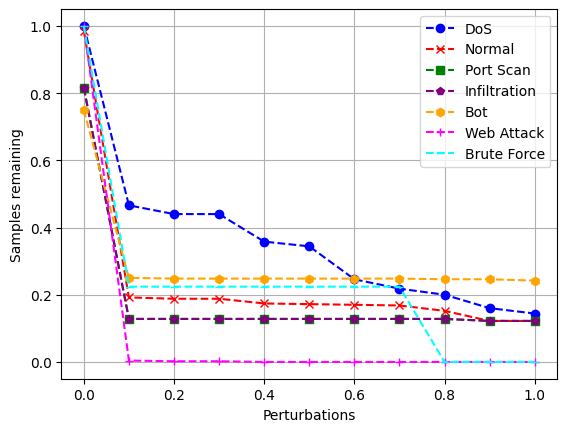

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt 

plt.clf()

y_axis_dos =  [1.0, 0.466, 0.44, 0.44, 0.358, 0.344, 0.246, 0.218, 0.2, 0.16, 0.144] 
y_axis_normal =  [0.986, 0.192, 0.188, 0.188, 0.174, 0.172, 0.17, 0.168, 0.152, 0.122, 0.122] 
y_axis_ps = [ 0.816, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.122, 0.122] 
y_axis_infiltration = [ 0.816, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.128, 0.122, 0.122]
y_axis_bot = [ 0.75, 0.25, 0.248, 0.248, 0.248, 0.248, 0.248, 0.248, 0.246, 0.246, 0.242] 
y_axis_web = [ 1.0, 0.004, 0.002, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
y_axis_brute =  [1.0, 0.224, 0.224, 0.224, 0.224, 0.224, 0.224, 0.224, 0.0, 0.0, 0.0] 

x_axis = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

# Plot the first line
plt.plot(x_axis, y_axis_dos, label='DoS', color='blue', linestyle='--', marker='o')

# Plot the second line
plt.plot(x_axis, y_axis_normal, label='Normal', color='red', linestyle='--', marker='x')

# Plot the third line
plt.plot(x_axis, y_axis_ps, label='Port Scan', color='green', linestyle='--', marker='s')

# Plot the fourth line
plt.plot(x_axis, y_axis_infiltration, label='Infiltration', color='purple', linestyle='--', marker='p')

# Plot the fifth line
plt.plot(x_axis, y_axis_bot, label='Bot', color='orange', linestyle='--', marker='h')

# Plot the sixth line
plt.plot(x_axis, y_axis_web, label='Web Attack', color='magenta', linestyle='--', marker='+')

# Plot the seventh line
plt.plot(x_axis, y_axis_brute, label='Brute Force', color='cyan', linestyle='--', marker='_')

# Enable grid lines (both major and minor grids)
plt.grid()

# Customize grid lines (optional)
# plt.grid()

# Add labels and a legend
plt.xlabel('Perturbations')
plt.ylabel('Samples remaining')
plt.legend()

# Set the title of the plot
# plt.title('Accuracy x Features - SHAP SML')

# Show the plot
plt.show()
plt.savefig('DNN_DL_CIC_Completeness.png')
plt.clf()